<a href="https://colab.research.google.com/github/G3ntl3g1ant/Stroke-Predictions/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [166]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from sklearn.decomposition import PCA

# Data Sets Considered for Processing

## Dataset 1

### Stroke Prediction Dataset

In [41]:
# Loading Dataset
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT0vbHuG9dm-OyRn1rZKMY5j62gdp7zyJIBId_4j1EMgfdfQqNB4rFXFsx6fZO2YyBmgu-QUXM8LWBm/pub?gid=3070235&single=true&output=csv'
df1 = pd.read_csv(path)
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Sources of the Data:**

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**Data Description:**

 According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.


This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. 



**Target:** 'stroke'



**Each Row Represents:** An Individual Patient



**Classification or Regression:** Classification



**Number of Features:** 10



**Number of Rows:** 5110



**Challenges:**
Challenges I can foresee as of now is at least the imputation of the bmi data, and what the best possible method as of now will be, whether to leave the data as 'Missing' or to input the mean, median or mode method. 

After further exploration of the data, I will make that final decision.

### Data Dictionary:

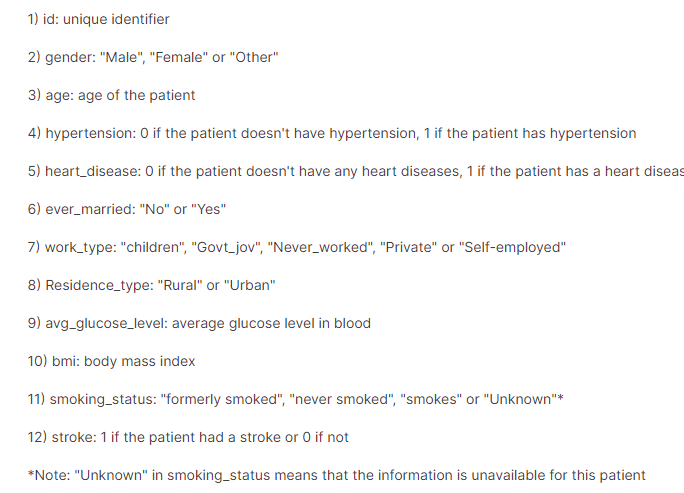

## Dataset 2

### Spanish Wine Quality

In [43]:
# Loading Dataset
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRl0Wh9JeyunxQLiFhHWMpaVWoc6qypJZt3g0NNS-ZmMKsvXy_m8P_lGF7ObGtMOW_EcWrAjWj_zwZU/pub?gid=1160769059&single=true&output=csv'
df2 = pd.read_csv(path)
df2.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


**Source of the Data:**

https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

**Data Description:**

This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points).

**Target:** 'price', what are the factors that lead to that final price of these red wines and can we predict the future prices of these wines using these factors.

**Each Row Represents:** 1 bottle of wine from a specific brand organized by year, flavor, etc.

**Classification or Regression:** Regression

**Number of Features:** 9

**Number of Rows:** 7500

**Challenges:**

With this data set, I think that this most difficult part will be the proper imputation of the data when it comes to 'body', 'acidity' and so on due to the fact that each of those in kind are subjective. So it depends whether it is best to leave the data missing or to impute the information. 

Also, on whether to try and keep in the 'num_reviews' column, because that might have some influence on the final result. 

I will have to delve in a bit deeper before making a final decision.

### Data Dictionary:

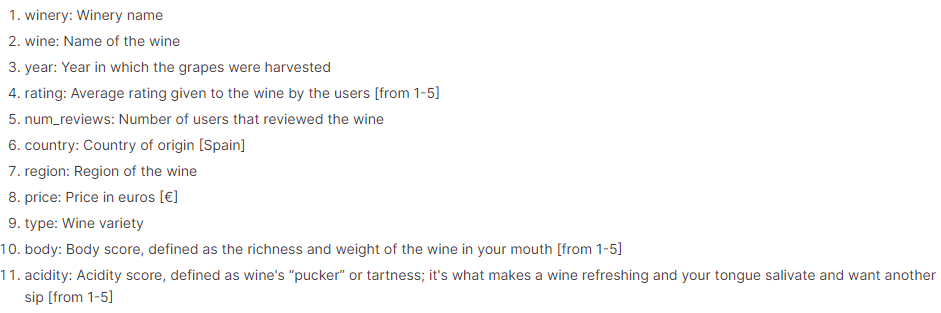

Chosen Dataset: **Stroke Prediction**

In [45]:
# Changing the df1 into df as the main dataframe
df = df1
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [46]:
# Looking over the info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Here we can already see that there are some inconsistencies as far as missing data, unnecessary columns and object data types.

These will be dealt with shortly, but first to look for duplicates in the data.

In [47]:
# Checking for duplicates 
df.duplicated().sum()

0

Great, now that we know there are no duplicates.

Now time to deal with unnecessary columns. 

With that in mind, I believe it is the best choice to remove the 'id' column due to that it is too unique for what we are looking for because it is the individual identifier for each patient.  

So the 'id' column will be removed.

In [48]:
# Dropping the 'id' column
df.drop(columns='id', inplace=True)
# Checking to see if the change took place
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Now that we have those taken care of, lets look into our object values.

In [49]:
# Checking the values for the 'gender' column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since there is only 1 occurance of 'other' it will be removed since it wont influence the final results by much. 

In [50]:
# Removing 'other' from the gender column
df = df[df.gender != 'Other']
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

Now with that change made, I will change Male and Female to 0 and 1 respectively since the choice is now binary in nature.

Changing the column name is also necessary since we are changing the values, I will change **gender** to **is_female**.

In [51]:
# Changing 'Female':1 and 'Male':0
replace_values = {'Female':1, 'Male':0}
df['gender'] = df['gender'].replace(replace_values)
# Changing the column name to is_female
df.rename(columns= {'gender':'is_female'}, inplace=True)
# Checking to see if the change took place
df['is_female'].value_counts()

<ipython-input-51-c2756ce6ca7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].replace(replace_values)
<ipython-input-51-c2756ce6ca7e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns= {'gender':'is_female'}, inplace=True)


1    2994
0    2115
Name: is_female, dtype: int64

In [52]:
# Checking the 'ever_married' column values
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

Since this is a binary result, I will go ahead and change the 'Yes' values to a 1 for a postive result and a 0 for a negative result, or a 'No'

I will leave the column the same name because the same answer is given but in a numerical value.

In [53]:
# Replacing values from 'Yes': 1 and 'No': 0
replace_values = {'Yes':1, 'No':0}
df['ever_married'] = df['ever_married'].replace(replace_values)
# Checking to see if the change took place
df['ever_married'].value_counts()

<ipython-input-53-af6d7845a358>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married'] = df['ever_married'].replace(replace_values)


1    3353
0    1756
Name: ever_married, dtype: int64

Now onto the next one.

In [54]:
# Checking the values of the 'work_type' column
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [55]:
# Removing the value of 'Never_worked' because it only occurs 22 times, 
# which should not influence the later findings
df = df[df.work_type != 'Never_worked']
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Name: work_type, dtype: int64

Because the remaining data is nominal, I will process this in a later cell using OneHotEncoder.

In [56]:
# Checking the values of the 'Residence_type' column
df['Residence_type'].value_counts()

Urban    2581
Rural    2506
Name: Residence_type, dtype: int64

Because this data is binary in nature(ordinal), I am going to change the values to 0 and 1, where 0 = not urban, and 1 = is urban. 

Also, I will be changing the column name to 'is_urban' to keep everthing consistent and organized.

In [57]:
# Replacing Urban and Rural to 1 and 0 respectively
replace_values2 = {'Rural':0, 'Urban':1}
df['Residence_type'] = df['Residence_type'].replace(replace_values2)
# Changing the name of the 'Residence_type' to 'is_urban'
df.rename(columns={'Residence_type':'is_urban'}, inplace=True)
# Checking to see if the change took place
df['is_urban'].value_counts()

<ipython-input-57-b128e2854985>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_type'] = df['Residence_type'].replace(replace_values2)
<ipython-input-57-b128e2854985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Residence_type':'is_urban'}, inplace=True)


1    2581
0    2506
Name: is_urban, dtype: int64

And finally, with working on the columns at least, we come to the last object column.

In [58]:
# Checking the values of the 'smoking_status' column
df['smoking_status'].value_counts()

never smoked       1878
Unknown            1536
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

With this the data is nominal, so this as well will be processed in a later cell by OneHotEncoder.

With checking that last object column, it is time to take one last look over our data before we Train Test Split.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   is_female          5087 non-null   int64  
 1   age                5087 non-null   float64
 2   hypertension       5087 non-null   int64  
 3   heart_disease      5087 non-null   int64  
 4   ever_married       5087 non-null   int64  
 5   work_type          5087 non-null   object 
 6   is_urban           5087 non-null   int64  
 7   avg_glucose_level  5087 non-null   float64
 8   bmi                4886 non-null   float64
 9   smoking_status     5087 non-null   object 
 10  stroke             5087 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 476.9+ KB


So with all the data accounted for, lets go ahead and split our data!

# Train Test Split

In [60]:
# Train test splitting the data
# Features
X = df.drop(columns=['stroke'])
# Target
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Exploratory Visuals

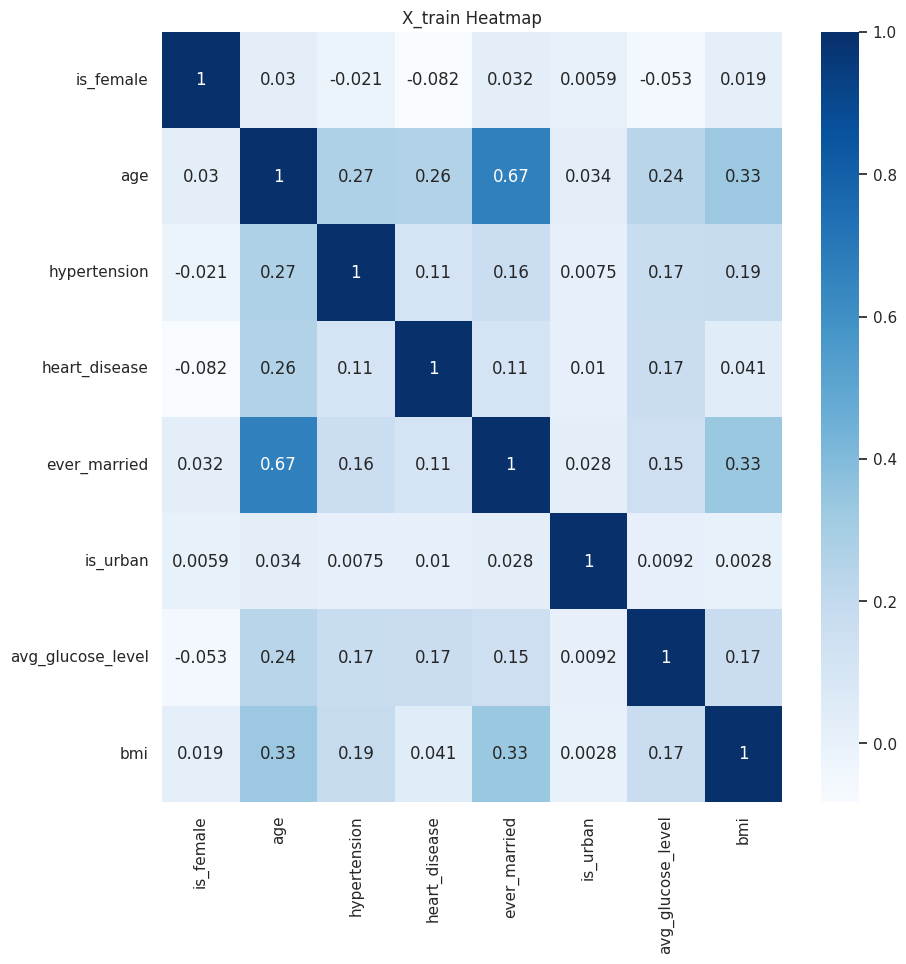

In [61]:
# Creating a heatmap to see what correlates together over the X_train Data
corr = X_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('X_train Heatmap');

Here we can see a correlation between age and ever_married column, which is interesting. 

Along with the correlation between bmi/age, bmi/ever_married and hypertension/age being the 4th highest. There are multiple columns that seem to at least slightly correlated. 

Although some like is_urban/bmi and is_urban/avg_glucose_level seem to be slightly negatively correlated, but not by much.

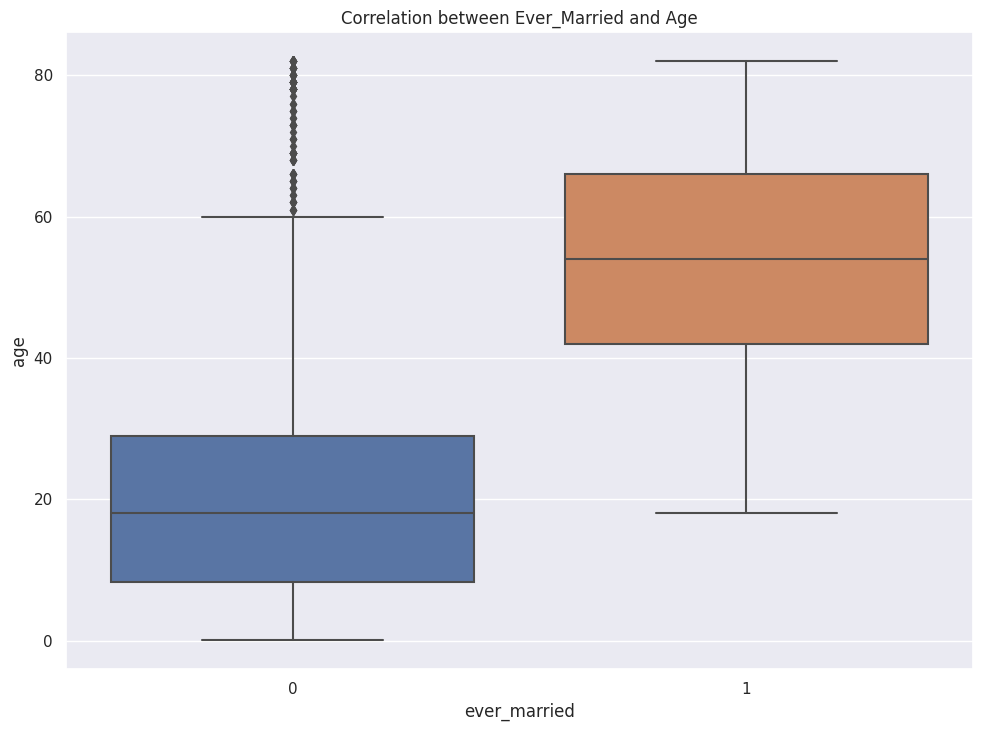

In [62]:
# Looking at the correlation between the 'ever_married' column and the 'age' column
sns.boxplot(data=df, x='ever_married', y='age')
plt.title('Correlation between Ever_Married and Age');

With this boxplot, we can see at present that the ever_married threshold is quite a bit higher at a grade average of 55 while the average single patient is just under the age of 20. 

So with this information it seems that those who are married on average are quite a bit older, at least around 20 years or more older.

(Not including the single outliers that range quite high.)

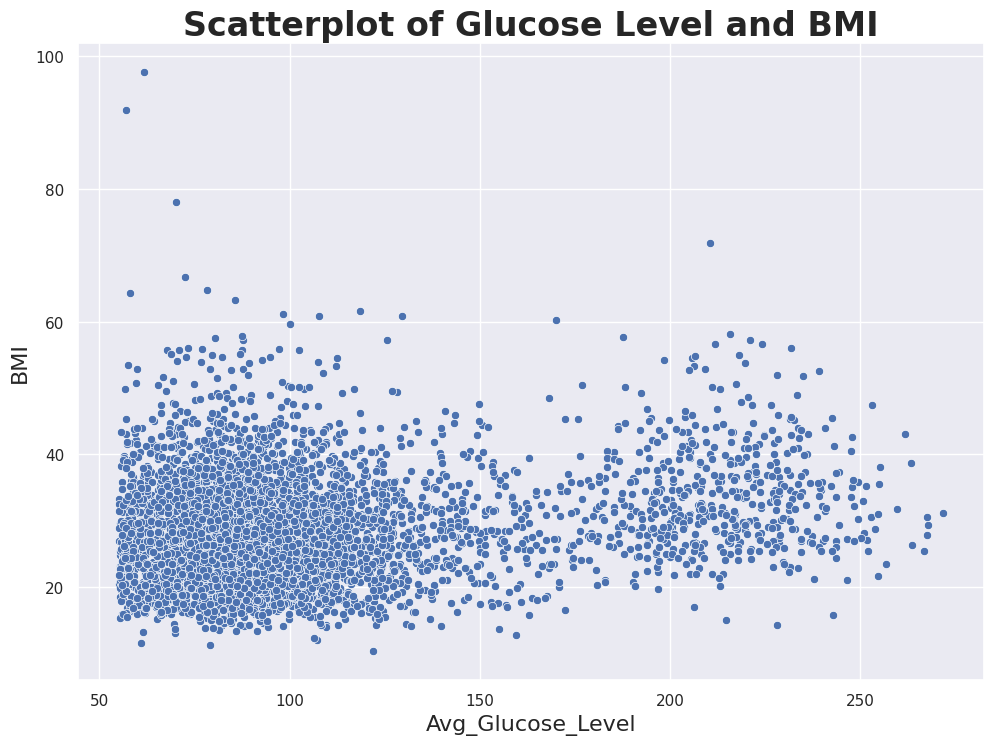

In [63]:
# Looking over the correlation between the 'avg_glucose_level' column and the 'bmi' column 
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi')
plt.title('Scatterplot of Glucose Level and BMI', fontsize = 24, fontweight = 'bold')
plt.xlabel('Avg_Glucose_Level', fontsize = 16)
plt.ylabel('BMI', fontsize = 16)
sns.set(rc={'figure.figsize':(11.7,8.27)});

We can see here that with age and avg_glucose_level that there seems to be a divide between the data, one with a larger amount of average aged patients to the left of 150, while what seems to be about 25% (if not lower) on the right side above 175. 

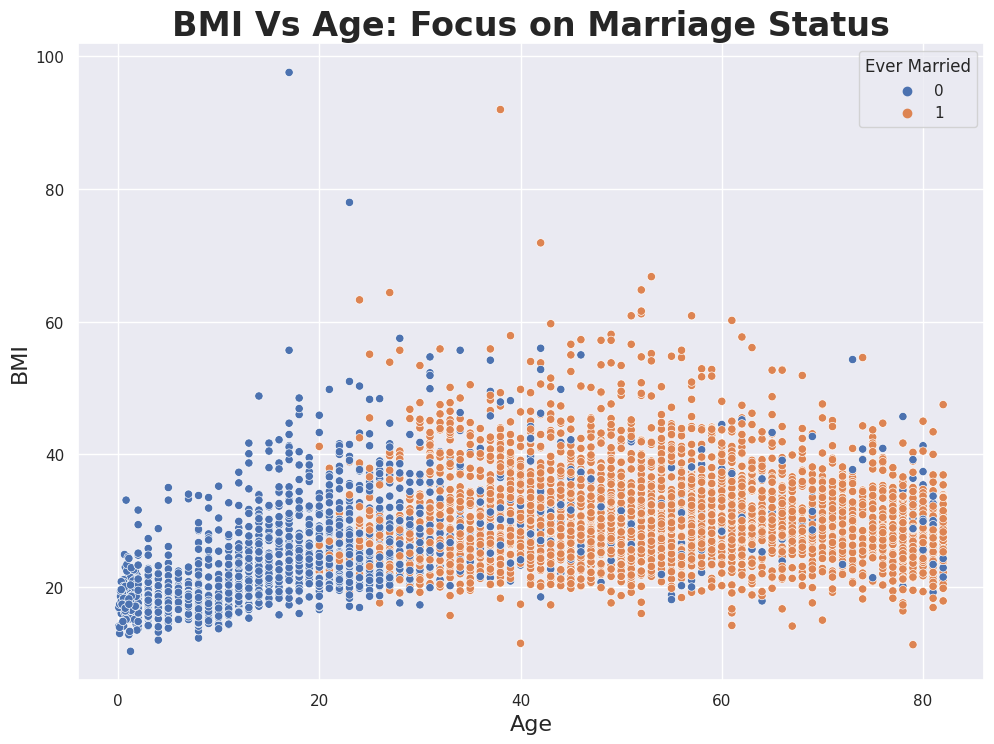

In [64]:
# Looking over the correlation between 'age' and 'bmi' with a focus on 'ever_married'
sns.scatterplot(data=df, x='age', y='bmi', hue= 'ever_married', palette='deep')
plt.title('BMI Vs Age: Focus on Marriage Status', fontsize = 24, fontweight = 'bold')
plt.xlabel('Age', fontsize = 16)
plt.ylabel('BMI', fontsize = 16)
plt.legend(title='Ever Married', loc = 'upper right')
sns.set(rc={'figure.figsize':(11.7,8.27)});

Above we can see that the overall age of marriage is in the patients early 20s all the way until the older ages of the 80s, with outliers of course. But we also see an interesting curve correlation in the BMI numbers increasing during middle age and then slightly decreasing into elderly age. 

But let us see what this looks like with stroke occurences. 

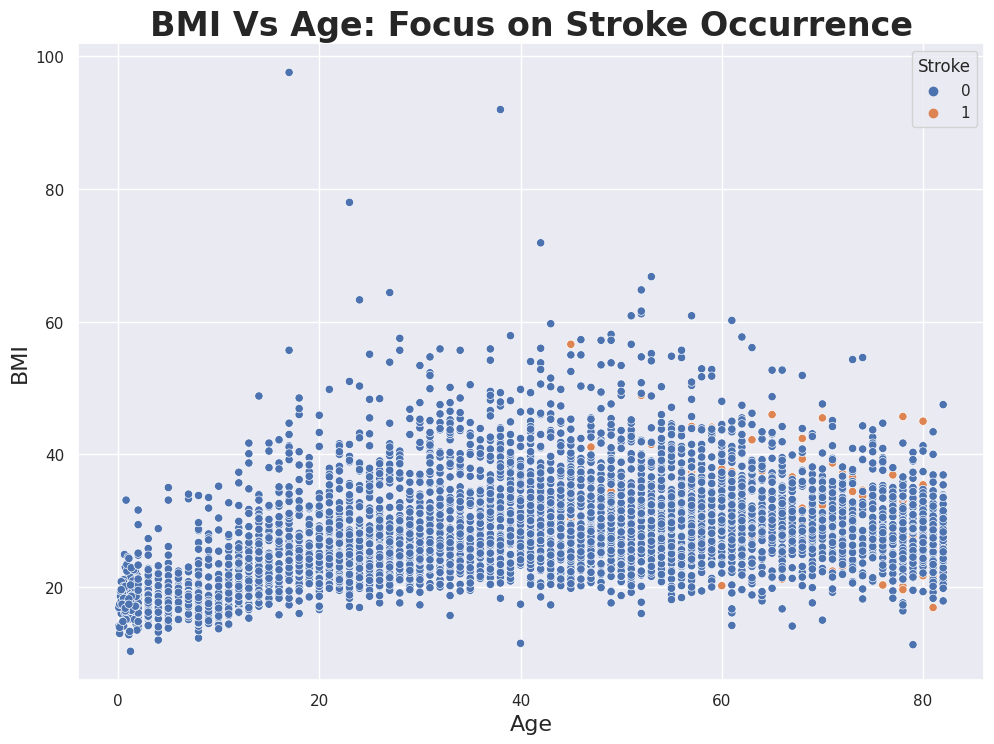

In [65]:
# Looking over the correlation between 'age' and 'bmi' with a focus on 'stroke'
sns.scatterplot(data=df, x='age', y='bmi', hue= 'stroke', palette='deep')
plt.title('BMI Vs Age: Focus on Stroke Occurrence', fontsize = 24, fontweight = 'bold')
plt.xlabel('Age', fontsize = 16)
plt.ylabel('BMI', fontsize = 16)
plt.legend(title='Stroke', loc = 'upper right')
sns.set(rc={'figure.figsize':(11.7,8.27)});

The curve is still ever present but there are far fewer in number that have had strokes, with the earliest occuring around the age of 45, all the way until around 83. 

But with so few occurences, it will make predicting a stroke victim dificult, but not impossible. 

Through the power Machine Learning!

I will be presenting both the comparison of BMI & Age with a focus on marriage status and the comparison of BMI & Age with a focus on Stroke Occurance. 

If time permits I would also like to present the scatterplot comparing Average Glucose Level to BMI as well.

# Modeling

I will be trying 3 different Classification Models for this particular problem:

**Predicting future victims of a Stroke Occurance.**

I will be building and tuning a KNeighbors Model, a RandomForest Model and an XGBoosted Model to see which one works best for this problem. 

## Data Preperation for Modeling

In [66]:
# Creating selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [67]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [68]:
# Numeric pipeline
num_pipe = make_pipeline(median_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [69]:
# Categorical pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [70]:
# Tuples for Column Transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
# Column Transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2d87b1e20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2d87b1250>)])

In [71]:
# Fitting preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2d87b1e20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2d87b1250>)])

## KNN Model

In [72]:
# Making default KNN Model
# Instantiating KNN pipline
knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())
# Fitting knn_pipe
knn_pipe.fit(X_train, y_train)
# knn_pred = knn predictions
knn_pred = knn_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1192
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1272
   macro avg       0.47      0.50      0.48      1272
weighted avg       0.88      0.94      0.91      1272



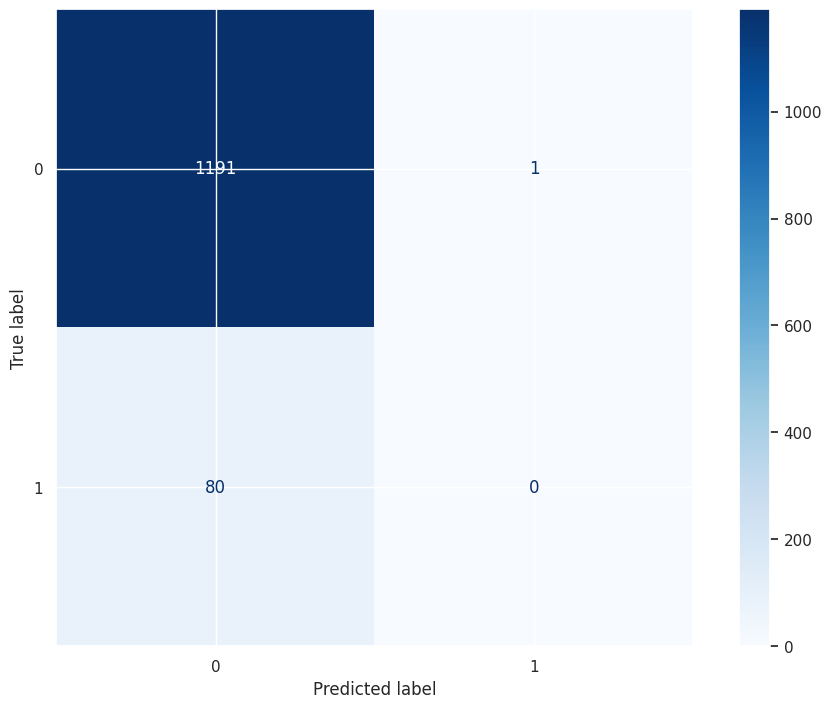

In [73]:
# Default KNN model breakdown
print(classification_report(y_test, knn_pred))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, cmap='Blues');

Looking over the data it sadly looks like it does not pick up on the Stroke class very well, but that is most likely due to the few occurances of strokes, so I will use SMOTE to 'balance' out the data.

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1192
           1       0.15      0.38      0.21        80

    accuracy                           0.83      1272
   macro avg       0.55      0.62      0.56      1272
weighted avg       0.90      0.83      0.86      1272



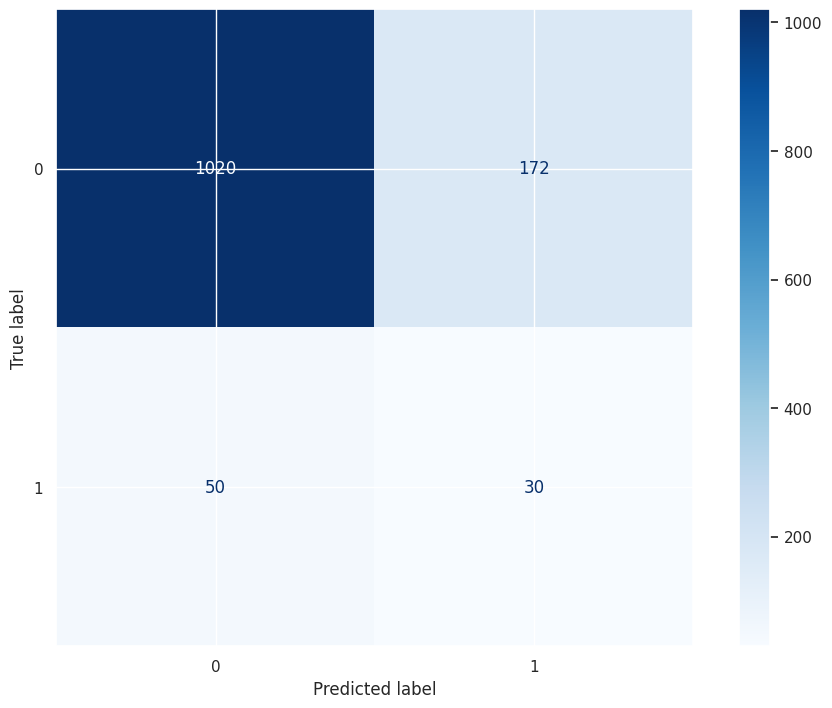

In [182]:
#Creating knn model pipeline with SMOTE and model
smote = SMOTE()
knn_smote = KNeighborsClassifier()
knn_smote_pipe = make_sampler_pipeline(preprocessor, smote, knn_smote)
#Fit and evaluate the model pipeline
knn_smote_pipe.fit(X_train, y_train)
test_predsknn = knn_smote_pipe.predict(X_test)
print(classification_report(y_test, test_predsknn))
ConfusionMatrixDisplay.from_predictions(y_test, test_predsknn,cmap='Blues');

This looks a bit better compared to the previous iteration of the model. Now to tune the model and see what other improvements can be made.  

In [89]:
# Creating a param_grid
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [81]:
# Creating a GridSearchCV
knn_pipe_gs = GridSearchCV(knn_pipe, smote, param_grid)
 
knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.9040880503144654


Now lets add the best version of the model and see the results.

In [92]:
# Making best KNN Model
# Instantiating KNN pipline
best_knn_pipe = make_sampler_pipeline(preprocessor, smote, KNeighborsClassifier(n_neighbors= 2, p=1, weights='uniform'))
# Fitting knn_pipe
best_knn_pipe.fit(X_train, y_train)
# knn_pred = knn predictions
best_knn_pred = knn_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1192
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1272
   macro avg       0.47      0.50      0.48      1272
weighted avg       0.88      0.94      0.91      1272



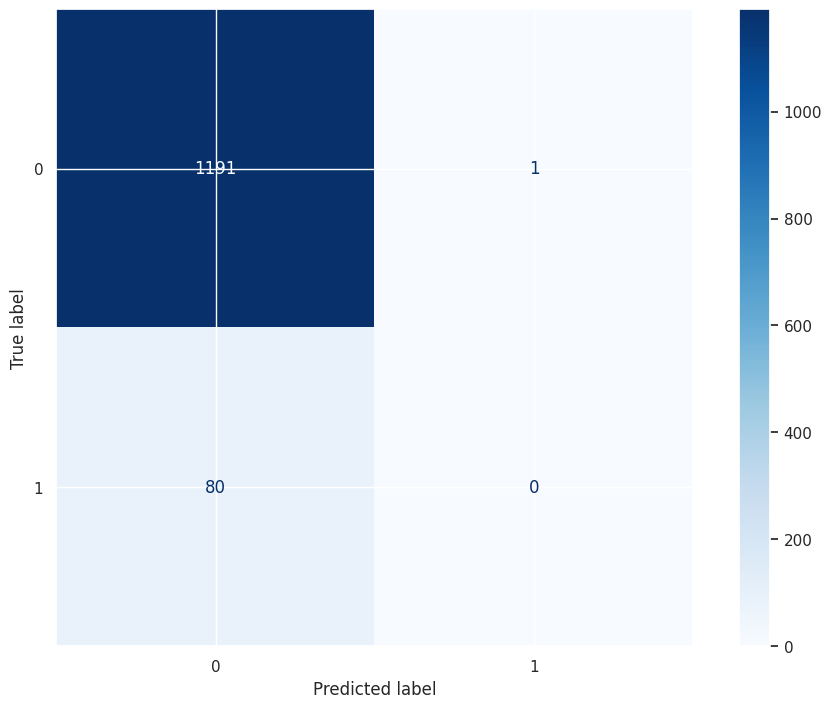

In [93]:
# KNN model breakdown
print(classification_report(y_test, best_knn_pred))
ConfusionMatrixDisplay.from_predictions(y_test, best_knn_pred, cmap='Blues');

As of now the best version is the SMOTE KNN model, with an f1 score of 0.21 and a recall score of 0.38 for positive stroke occurances. Which is not great, but is leaps and bounds better than what it was prior.

We still have 2 more models to explore and test, I will be doing a similar process using SMOTE and GridSeachCV in order to find the best versions of each model. 

## RandomForest Model

In [75]:
# Makeing default RandomForestClassifier model
# Instantiating RandomForest
rf_pipe = make_pipeline(preprocessor, RandomForestClassifier())
# Fitting rf_pipe
rf_pipe.fit(X_train, y_train)
# drf_pred = default RandomForest predictions
drf_pred = rf_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1192
           1       0.00      0.00      0.00        80

    accuracy                           0.93      1272
   macro avg       0.47      0.50      0.48      1272
weighted avg       0.88      0.93      0.91      1272



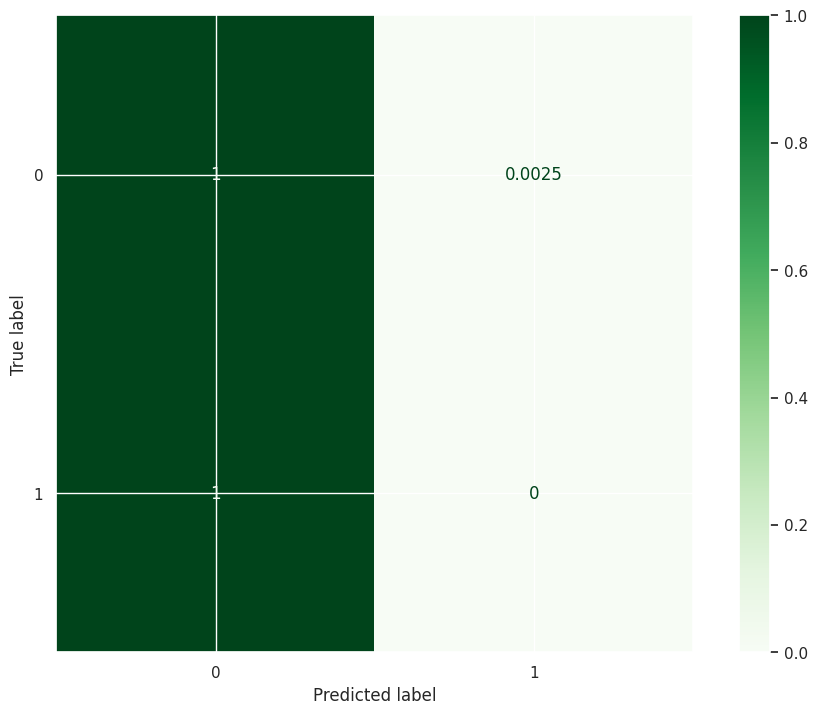

In [76]:
# Default RandomForest model breakdown
print(classification_report(y_test, drf_pred))
ConfusionMatrixDisplay.from_predictions(y_test, drf_pred, normalize='true',cmap='Greens');

Seeing that the data here is doing similar to the prior model, I and going to use the same balancer of SMOTE to balance the data. 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1192
           1       0.18      0.07      0.11        80

    accuracy                           0.92      1272
   macro avg       0.56      0.53      0.53      1272
weighted avg       0.89      0.92      0.90      1272



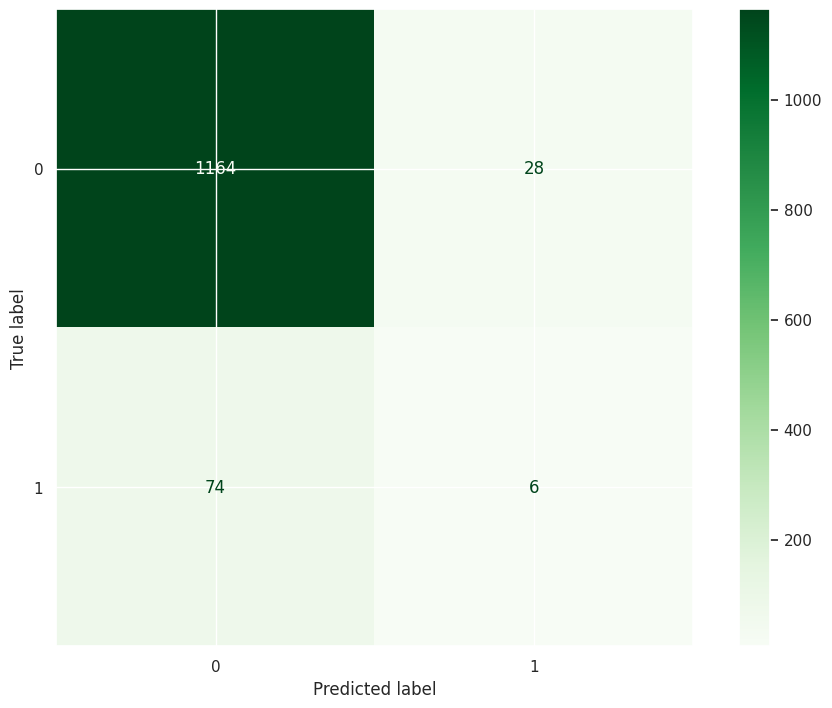

In [161]:
#Creating RandomForest model pipeline with SMOTE and model
rf_smote = RandomForestClassifier()
rf_smote_pipe = make_sampler_pipeline(preprocessor, smote, rf_smote)
#Fit and evaluate the model pipeline
rf_smote_pipe.fit(X_train, y_train)
test_preds = rf_smote_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,cmap='Greens');

It seems that this version of the RandomForest did better than the previous iteration, but however was not better than the knn model as of now.

I will now tune this model.

In [162]:
# Creating param Grid
rf_param_grid = {'randomforestclassifier__max_depth': [4,5,6],
                 'randomforestclassifier__min_samples_leaf': [1,2,3],
                 'randomforestclassifier__min_samples_split': [3,4,5]}

In [163]:
# Creating GridSearch
rf_pipe_gs = GridSearchCV(rf_pipe, rf_param_grid)

rf_pipe_gs.fit(X_train, y_train)
print('Best RandomForest Parameters:')
print(rf_pipe_gs.best_params_)
rf_best_pipe = rf_pipe_gs.best_estimator_
print(f'Accuracy of best RandomForest model is: {rf_best_pipe.score(X_test, y_test)}')

Best RandomForest Parameters:
{'randomforestclassifier__max_depth': 4, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 3}
Accuracy of best RandomForest model is: 0.9371069182389937


In [159]:
# Making best RandomForest Model
# Instantiating RandomForest pipline
rf_pipe2 = RandomForestClassifier(max_depth=4, min_samples_split=3, min_samples_leaf=1)
best_rf_pipe = make_sampler_pipeline(preprocessor, smote, rf_pipe2)
# Fitting best_rf_pipe
best_rf_pipe.fit(X_train, y_train)
# best_rf_pred = best knn predictions
best_rf_pred = rf_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1192
           1       0.00      0.00      0.00        80

    accuracy                           0.93      1272
   macro avg       0.47      0.50      0.48      1272
weighted avg       0.88      0.93      0.91      1272



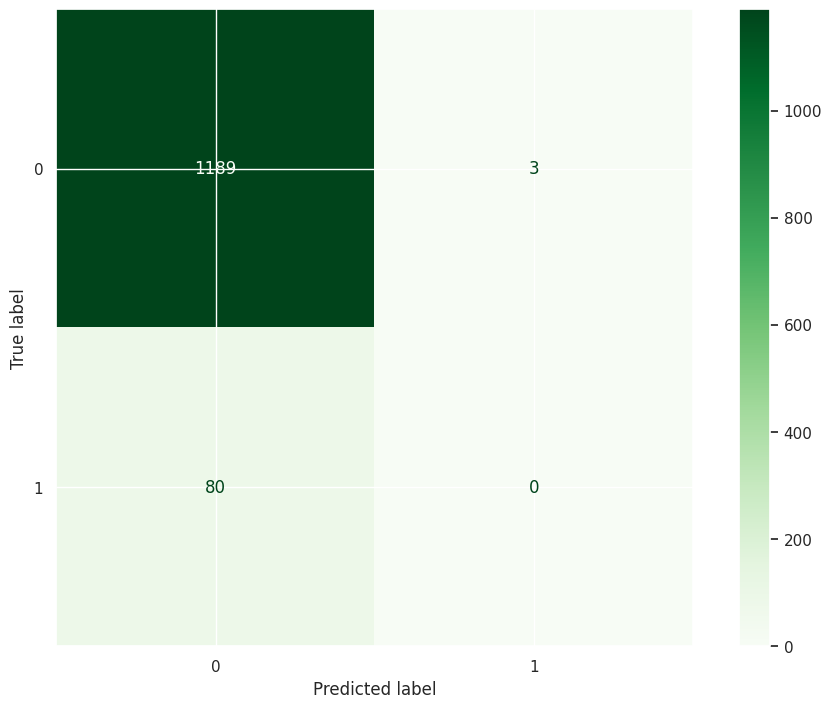

In [160]:
# RandomForest model breakdown
print(classification_report(y_test, best_rf_pred))
ConfusionMatrixDisplay.from_predictions(y_test, best_rf_pred, cmap='Greens');

The best version of the RandomForest model was the previous iteration with SMOTE, although it still pales in comparison to the KNN model. 

With RandomForest only able to get a score of 0.09 for f1 score and 0.06 for recall, the best model so far is the KNN model, but there is one more model to test.

## XGBoosted Model

In [77]:
# Makeing default XGBClassifier model
# Instantiating XGBClassifier
xgb_pipe = make_pipeline(preprocessor, XGBClassifier())
# Fitting rf_pipe
xgb_pipe.fit(X_train, y_train)
# drf_pred = default RandomForest predictions
dxgb_pred = rf_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1192
           1       0.00      0.00      0.00        80

    accuracy                           0.93      1272
   macro avg       0.47      0.50      0.48      1272
weighted avg       0.88      0.93      0.91      1272



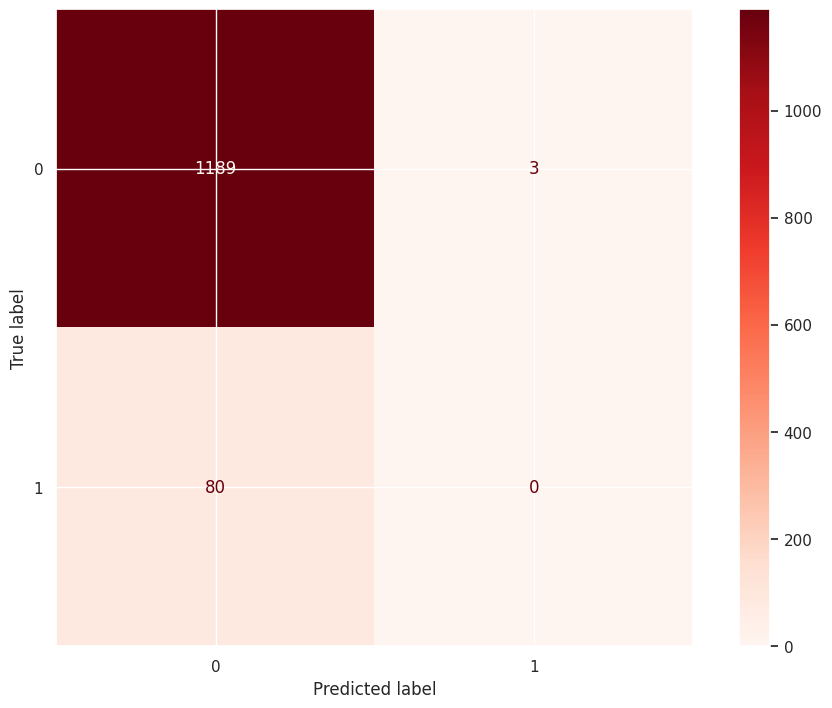

In [104]:
#  default model breakdown
print(classification_report(y_test, dxgb_pred))
ConfusionMatrixDisplay.from_predictions(y_test, dxgb_pred, cmap='Reds');

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1192
           1       0.15      0.06      0.09        80

    accuracy                           0.92      1272
   macro avg       0.55      0.52      0.52      1272
weighted avg       0.89      0.92      0.90      1272



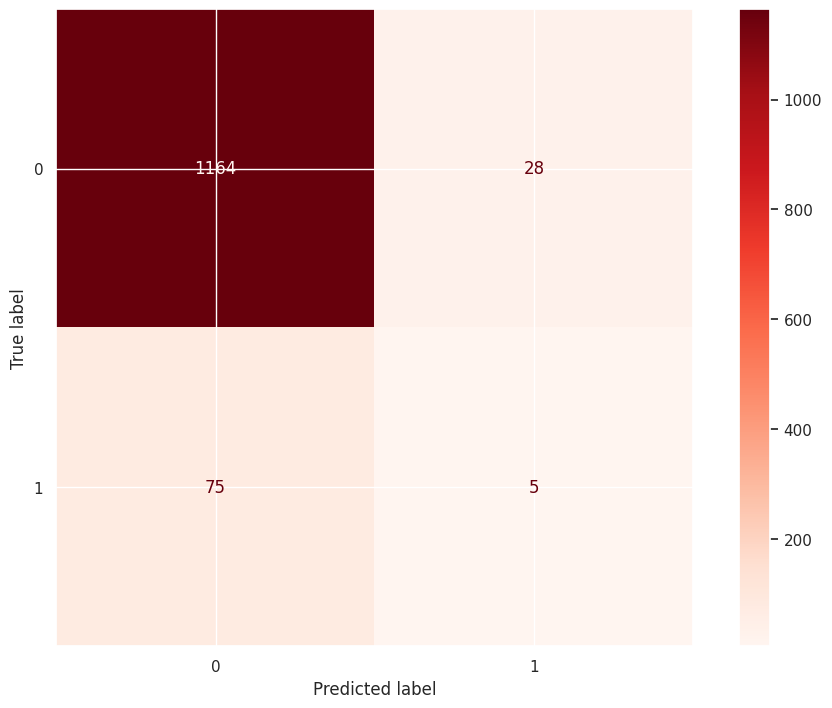

In [108]:
#Creating XGBClassifier model pipeline with SMOTE and model
xgb_smote = XGBClassifier()
xgb_smote_pipe = make_sampler_pipeline(preprocessor, smote, xgb_smote)
#Fit and evaluate the model pipeline
xgb_smote_pipe.fit(X_train, y_train)
test_preds = xgb_smote_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,cmap='Reds');

This model did better than RandomForest but worse than KNN, so now I shall tune this last model. 

In [149]:
# Checking over available parameters
xgb_smote_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2d87b1e20>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
      

In [154]:
# Creating param Grid
xgb_param_grid = {'xgbclassifier__n_estimators':[100, 200, 300],
                  'xgbclassifier__max_depth': [3, 6, 9],
                  'xgbclassifier__min_child_weight': [1, 3, 5],
                  'xgbclassifier__max_delta_step': range(1,11)}

In [155]:
# Creating GridSearch
xgb_pipe_gs = GridSearchCV(xgb_smote_pipe, 
                           param_grid= xgb_param_grid)

xgb_pipe_gs.fit(X_train, y_train)
print('Best XGB Parameters:')
print(xgb_pipe_gs.best_params_)
xgb_best_pipe = xgb_pipe_gs.best_estimator_
print(f'Accuracy of best XGB model is: {rf_best_pipe.score(X_test, y_test)}')

Best XGB Parameters:
{'xgbclassifier__max_delta_step': 2, 'xgbclassifier__max_depth': 3, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 300}
Accuracy of best XGB model is: 0.9371069182389937


In [156]:
# Making best XGB Model
# Instantiating XGB pipline
xgb_pipe2 = XGBClassifier(max_delta_step=2, max_depth=3, min_child_weight=1, n_estimators=300)
best_xgb_pipe = make_sampler_pipeline(preprocessor, smote, xgb_pipe2)
# Fitting best_xgb_pipe
best_xgb_pipe.fit(X_train, y_train)
# best_xgb_pred = best XGB predictions
best_xgb_pred = xgb_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1192
           1       0.36      0.10      0.16        80

    accuracy                           0.93      1272
   macro avg       0.65      0.54      0.56      1272
weighted avg       0.91      0.93      0.91      1272



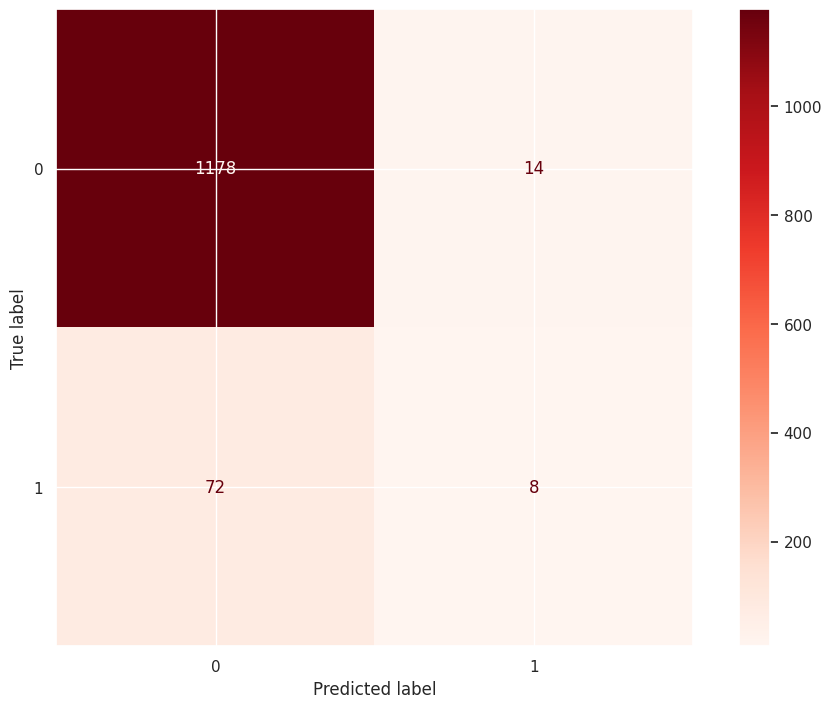

In [157]:
# KNN model breakdown
print(classification_report(y_test, best_xgb_pred))
ConfusionMatrixDisplay.from_predictions(y_test, best_xgb_pred, cmap='Reds');

After careful consideration and looking over the data, I believe the best choice over the 3 presented choices is the KNN Model.

It had the highest overall recall score of 0.34 and more importantly the highest score of an f1 score of 0.19. 

The others were good contenders, but the RandomForest Model was severly lacking in precision and recall scores, the XGBClassifier Model was very close to being chosen, but I only want the overall best Model.

Which is the KNN Model.

# Adding PCA to the Best Model and Evaluating

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1192
           1       1.00      0.01      0.02        80

    accuracy                           0.94      1272
   macro avg       0.97      0.51      0.50      1272
weighted avg       0.94      0.94      0.91      1272

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1192
           1       0.15      0.38      0.21        80

    accuracy                           0.83      1272
   macro avg       0.55      0.62      0.56      1272
weighted avg       0.90      0.83      0.86      1272



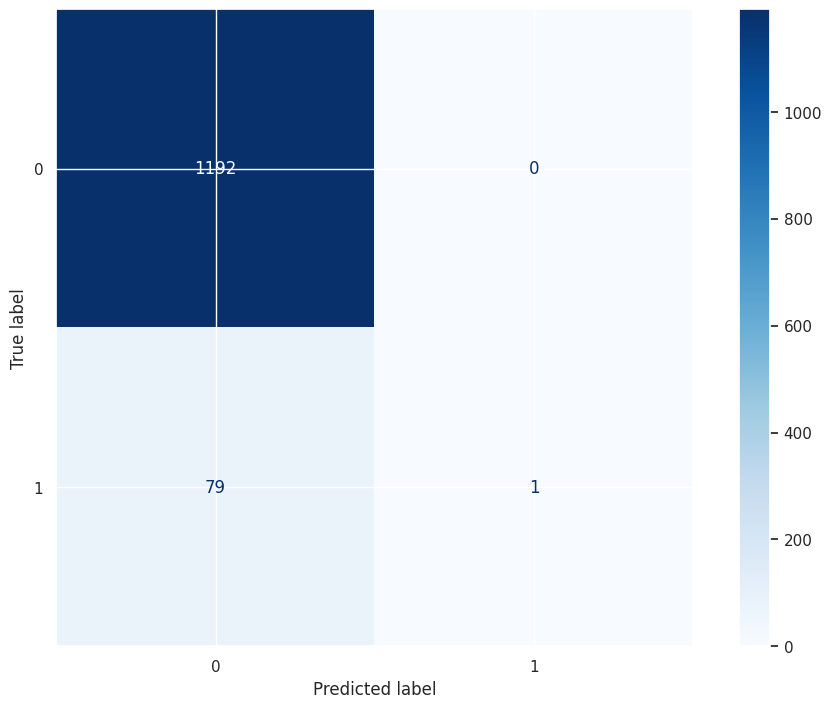

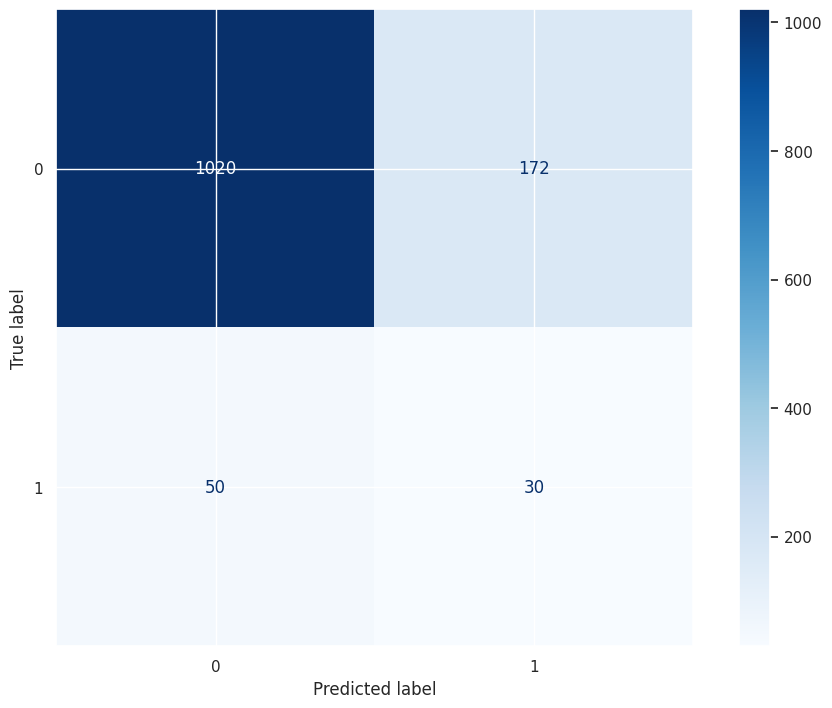

In [183]:
# Creating PCA pipeline
knn_pca_pipe = make_pipeline(preprocessor, PCA(n_components=.95), knn_smote)
#Fit and evaluate the model pipeline
knn_pca_pipe.fit(X_train, y_train)
test_preds2 = knn_pca_pipe.predict(X_test)
print(classification_report(y_test, test_preds2))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds2,cmap='Blues');
print(classification_report(y_test, test_predsknn))
ConfusionMatrixDisplay.from_predictions(y_test, test_predsknn,cmap='Blues');

# Results

Although PCA did better than some of the default Models, if I had to impliment a production model, it would have to be the KNN Model. 